- ## [File Handling](#file-handling)
    - [Opening Files for Reading](#opening-files-for-reading)
    - [Opening Files for Writing and Updating](#opening-files-for-writing-and-updating)
    - [Deleting Files](#deleting-files)
  - [File Types](#file-types)
    - [File with txt Extension](#file-with-txt-extension)
    - [File with json Extension](#file-with-json-extension)
    - [Changing JSON to Dictionary](#changing-json-to-dictionary)
    - [Changing Dictionary to JSON](#changing-dictionary-to-json)
    - [Saving as JSON File](#saving-as-json-file)
    - [File with csv Extension](#file-with-csv-extension)
    - [Pandas lib csv Extension](#file-with-csv-extension)
  - [Exercises: Day ]
    - [Exercises: Level 1](#exercises-level-1)
    - [Exercises: Level 2](#exercises-level-2)

## File Handling

So far we have seen different Python data types. We usually store our data in different file formats. In addition to handling files, we will also see different file formats(.txt, .json, .xml, .csv, .tsv, .excel) in this section. First, let us get familiar with handling files with common file format(.txt).

File handling is an import part of programming which allows us to create, read, update and delete files. In Python to handle data we use _open()_ built-in function.

In [46]:
open('filename', mode) # mode(r, a, w, x, t,b)  could be to read, write, update

NameError: name 'mode' is not defined

- "r" - Read - Default value. Opens a file for reading, it returns an error if the file does not exist
- "a" - Append - Opens a file for appending, creates the file if it does not exist
- "w" - Write - Opens a file for writing, creates the file if it does not exist
- "x" - Create - Creates the specified file, returns an error if the file exists
- "t" - Text - Default value. Text mode
- "b" - Binary - Binary mode (e.g. images)


### Opening Files for Reading

The default mode of _open_ is reading, so we do not have to specify 'r' or 'rt'. I have created and saved a file named reading_file_example.txt in the files directory. Let us see how it is done:

In [5]:
f = open('./files/reading_file_example.txt')
print(f) # <_io.TextIOWrapper name='./files/reading_file_example.txt' mode='r' encoding='UTF-8'>

<_io.TextIOWrapper name='./files/reading_file_example.txt' mode='r' encoding='cp1252'>


In [50]:
f = open('Screenshot (117).png',mode="rb")
print(f) 

<_io.BufferedReader name='Screenshot (117).png'>


In [4]:
from PIL import Image
import io

# Open the image file in binary mode
with open('Screenshot (117).png', mode="rb") as f:
    image_data = f.read()

# Convert the binary data to an image
image = Image.open(io.BytesIO(image_data))

# Display the image
image.show()

ModuleNotFoundError: No module named 'PIL'

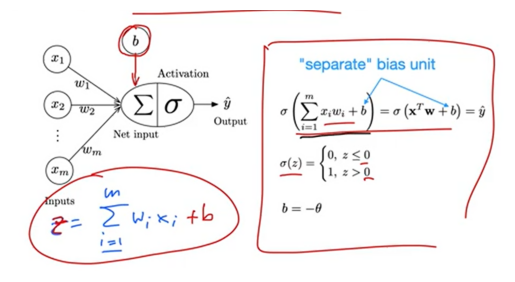

In [52]:
import matplotlib.pyplot as plt
from PIL import Image
import io

# Open the image file in binary mode
with open('Screenshot (117).png', mode="rb") as f:
    image_data = f.read()

# Convert the binary data to an image
image = Image.open(io.BytesIO(image_data))

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

As you can see in the example above, I printed the opened file and it gave  some information about it. Opened file has different reading methods: _read()_, _readline_, _readlines_. An opened file has to be closed with _close()_ method.

- _read()_: read the whole text as string. If we want to limit the number of characters we want to read, we can limit it by passing int value to the *read(number)* method.

In [6]:
f = open('./files/reading_file_example.txt')
txt = f.read()
print(type(txt))
print(txt)
f.close()

<class 'str'>
This is an example to show how to open a file and read.
This is the second line of the text.I love python


In [7]:
#Instead of printing all the text, let us print the first 10 characters of the text file.

f = open('./files/reading_file_example.txt')
txt = f.read(10)
print(type(txt))
print(txt)
f.close()

<class 'str'>
This is an


- _readline()_: read only the first line

In [73]:
f = open('./files/reading_file_example.txt')
line = f.readline()
print(type(line))
print(line)
f.close()

<class 'str'>
This is an example to show how to open a file and read.



- _readlines()_: read all the text line by line and returns a list of lines

In [74]:
f = open('./files/reading_file_example.txt')
lines = f.readlines()
print(type(lines))
print(lines)
f.close()

<class 'list'>
['This is an example to show how to open a file and read.\n', 'This is the second line of the text.I love pythonThis text has to be appended at the end']


Another way to get all the lines as a list is using _splitlines()_:

In [75]:
f = open('./files/reading_file_example.txt')
lines = f.read().splitlines()
print(type(lines))
print(lines)
f.close()

<class 'list'>
['This is an example to show how to open a file and read.', 'This is the second line of the text.I love pythonThis text has to be appended at the end']


After we open a file, we should close it. There is a high tendency of forgetting to close them. There is a new way of opening files using _with_ - closes the files by itself. Let us rewrite the the previous example with the _with_ method:

In [76]:
with open('./files/reading_file_example.txt') as f:
    lines = f.read().splitlines()
    print(type(lines))
    print(lines)

<class 'list'>
['This is an example to show how to open a file and read.', 'This is the second line of the text.I love pythonThis text has to be appended at the end']


### Opening Files for Writing and Updating

To write to an existing file, we must add a mode as parameter to the _open()_ function:

- "a" - append - will append to the end of the file, if the file does not it creates a new file.
- "w" - write - will overwrite any existing content, if the file does not exist it creates.

Let us append some text to the file we have been reading:


In [145]:
with open('./files/reading_file_example.txt','a') as f:
    f.write('This text has to be appended at the end')

In [152]:
filepath = './files/reading_file_example.txt'
with open(filepath,'a') as f:
    f1=f.write('step by step python are coming to me hahaha')
with open(filepath,'r') as f:
    f1=f.read()
f1


'This is an example to show how to open a file and read.\nThis is the second line of the text.I love pythonThis text has to be appended at the endThis text has to be appended at the endThis text has to be appended at the endstep by step python are coming to me hahahastep by step python are coming to me hahahastep by step python are coming to me hahahastep by step python are coming to me hahahastep by step python are coming to me hahahastep by step python are coming to me hahahastep by step python are coming to me hahaha'

The method below creates a new file, if the file does not exist:


In [78]:
with open('./files/writing_file_example.txt','w') as f:
    f.write('This text will be written in a newly created file')

### Deleting Files

We have seen in previous section, how to make and remove a directory using _os_ module. Again now, if we want to remove a file we use _os_ module.


In [14]:
import os
os.remove('./files/example.txt')

In [15]:
import os
if os.path.exists('./files/example.txt'):
    os.remove('./files/example.txt')
else:
    print('The file does not exist')

The file does not exist


## File Types

### File with txt Extension

File with _txt_ extension is a very common form of data and we have covered it in the previous section. Let us move to the JSON file

### File with json Extension

JSON stands for JavaScript Object Notation. Actually, it is a stringified JavaScript object or Python dictionary.

_Example:_

In [85]:
# dictionary
person_dct= {
    "name":"Asabeneh",
    "country":"Finland",
    "city":"Helsinki",
    "skills":["JavaScrip", "React","Python"]
}
# JSON: A string form a dictionary
person_json1 = "{'name': 'Asabeneh', 'country': 'Finland', 'city': 'Helsinki', 'skills': ['JavaScrip', 'React', 'Python']}"
print(person_json1)
# we use three quotes and make it multiple line to make it more readable
person_json = '''{
    "name":"Asabeneh",
    "country":"Finland",
    "city":"Helsinki",
    "skills":["JavaScrip", "React","Python"]
}'''
print(person_json)

{'name': 'Asabeneh', 'country': 'Finland', 'city': 'Helsinki', 'skills': ['JavaScrip', 'React', 'Python']}
{
    "name":"Asabeneh",
    "country":"Finland",
    "city":"Helsinki",
    "skills":["JavaScrip", "React","Python"]
}


### Changing JSON to Dictionary
To change a JSON to a dictionary, first we import the json module and then we use _loads_ method.

In [84]:
import json
# JSON
person_json = '''{
    "name": "heloooo",
    "country": "Finland",
    "city": "Helsinki",
    "skills": ["JavaScrip", "React", "Python"]
}'''
print(person_json)
print(type(person_json))

# let's change JSON to dictionary
person_dct = json.loads(person_json)
print(type(person_dct))
print(person_dct)
print(person_dct['name'])


{
    "name": "heloooo",
    "country": "Finland",
    "city": "Helsinki",
    "skills": ["JavaScrip", "React", "Python"]
}
<class 'str'>
<class 'dict'>
{'name': 'heloooo', 'country': 'Finland', 'city': 'Helsinki', 'skills': ['JavaScrip', 'React', 'Python']}
heloooo


### Changing Dictionary to JSON
To change a dictionary to a JSON we use _dumps_ method from the json module.

In [87]:
import json
# python dictionary
person = {
    "name": "Asabeneh",
    "country": "Finland",
    "city": "Helsinki",
    "skills": ["JavaScrip", "React", "Python"]
}
# let's convert it to  json
person_json = json.dumps(person, indent=8) # indent could be 2, 4, 8. It beautifies the json
print(type(person_json))
print(person_json)

<class 'str'>
{
        "name": "Asabeneh",
        "country": "Finland",
        "city": "Helsinki",
        "skills": [
                "JavaScrip",
                "React",
                "Python"
        ]
}


In [82]:
# when you print it, it does not have the quote, but actually it is a string
# JSON does not have type, it is a string type.

### Saving as JSON File

We can also save our data as a json file. Let us save it as a json file using the following steps. For writing a json file, we use the json.dump() method, it can take dictionary, output file, ensure_ascii and indent.

In [27]:
import json
# python dictionary
person = {
    "name": "Asabeneh",
    "country": "Finland",
    "city": "Helsinki",
    "skills": ["JavaScrip", "React", "Python"]
}
with open('./files/json_example.json', 'w', encoding='utf-8') as f:
    json.dump(person, f, ensure_ascii=False, indent=4)
#In the code above, we use encoding and indentation. Indentation makes the json file easy to read.


### File with csv Extension

CSV stands for comma separated values. CSV is a simple file format used to store tabular data, such as a spreadsheet or database. CSV is a very common data format in data science.

**Example:**

```csv
"name","country","city","skills"
"Asabeneh","Finland","Helsinki","JavaScript"
```

**Example:**


In [95]:
import csv
with open('./files/csv_example.csv') as f:
    csv_reader = csv.reader(f, delimiter=',') # w use, reader method to read csv
    print(csv_reader)

## Read CSV with Pandas
### Some basic pandas function
Series data srtucture(creating from list,tuple)
DataFrame(Creating from dictionary,list)
head()
tail()?
describe()
nunique
value_count()
sum()
min(),max()
accessing specific columns from data
loc
iloc
isnull()
fillna()
ffil()

In [138]:
import pandas as pd
d = pd.read_csv("Data/Data.csv")
d
#head()
#tail()
#describe()
#nunique
#d.Age
#d.age.sum()
#d['Age']
#d['Age','Salary']

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [127]:
d.loc[[1,2,3,4,4]]

,Country,Age,Salary,Purchased
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
4,Germany,40.0,NaN,Yes


In [133]:
d.loc[2,"Age"]

30.0

In [134]:
d.loc[0:,'Age']

0    44.0
1    27.0
2    30.0
3    38.0
4    40.0
5    35.0
6     NaN
7    48.0
8    50.0
9    37.0
Name: Age, dtype: float64

In [143]:
d.iloc[0:,0:2]

,Country,Age
0,France,44.0
1,Spain,27.0
2,Germany,30.0
3,Spain,38.0
4,Germany,40.0
5,France,35.0
6,Spain,NaN
7,France,48.0
8,Germany,50.0
9,France,37.0


In [144]:
d.iloc[0]

Country       France
Age             44.0
Salary       72000.0
Purchased         No
Name: 0, dtype: object

## Audio file

In [90]:
from IPython.display import Audio

# Load and play the audio file
audio_path = "marketplace.mp3"  # Replace with your file path
Audio(audio_path)

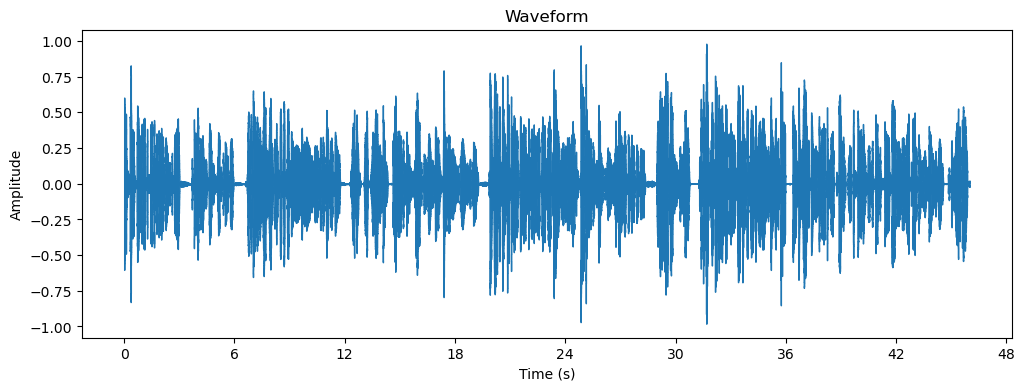

In [94]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load(audio_path, sr=None)  # sr=None keeps the original sample rate

# Display waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


### Exercises: Level 1

1. Read the countries_data.json data file in data directory, create a function that finds the ten most spoken languages

   ```py
   # Your output should look like this
   print(most_spoken_languages(filename='./data/countries_data.json', 10))
   [(91, 'English'),
   (45, 'French'),
   (25, 'Arabic'),
   (24, 'Spanish'),
   (9, 'Russian'),
   (9, 'Portuguese'),
   (8, 'Dutch'),
   (7, 'German'),
   (5, 'Chinese'),
   (4, 'Swahili'),
   (4, 'Serbian')]

   # Your output should look like this
   print(most_spoken_languages(filename='./data/countries_data.json', 3))
   [(91, 'English'),
   (45, 'French'),
   (25, 'Arabic')]
   ```

2. Read the countries_data.json data file in data directory, create a function that creates a list of the ten most populated countries

   ```py
   # Your output should look like this
   print(most_populated_countries(filename='./data/countries_data.json', 10))

   [
   {'country': 'China', 'population': 1377422166},
   {'country': 'India', 'population': 1295210000},
   {'country': 'United States of America', 'population': 323947000},
   {'country': 'Indonesia', 'population': 258705000},
   {'country': 'Brazil', 'population': 206135893},
   {'country': 'Pakistan', 'population': 194125062},
   {'country': 'Nigeria', 'population': 186988000},
   {'country': 'Bangladesh', 'population': 161006790},
   {'country': 'Russian Federation', 'population': 146599183},
   {'country': 'Japan', 'population': 126960000}
   ]

   # Your output should look like this

   print(most_populated_countries(filename='./data/countries_data.json', 3))
   [
   {'country': 'China', 'population': 1377422166},
   {'country': 'India', 'population': 1295210000},
   {'country': 'United States of America', 'population': 323947000}
   ]
   ```

### Exercises: Level 2

3. Write a python application that checks similarity between two texts. It takes a file as a parameter and it will evaluate the Jaccard similarity of the two texts. For instance check the similarity between the transcripts of (data/michelle_obama_speech.txt) and (data/melina_trump_speech.txt) speech. You may need a couple of functions, function to clean the text(clean_text), function to remove stopwords(remove_stop_words) and finally to check the similarity(check_text_similarity). List of stop words (data/stop_words.py) are in the data directory

# Jaccard Similarity fORMULA
J(A,B)= ∣A∪B∣/∣A∩B∣
​A and 𝐵 are two sets (e.g., sets of words from two documents).

∣A∩B∣ is the number of common elements in both sets.
∣A∪B∣ is the total number of unique elements in both sets combined.
